In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [32]:
#Read video or image sequence using:
cap = cv.VideoCapture(r"C:\Users\4220056\Downloads\video.avi")

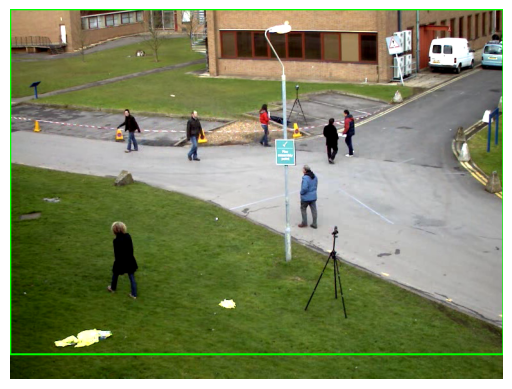

In [ ]:
ret, background = cap.read()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Video ended or failed to read frame.")
        break

    diff = cv.subtract(background, frame)

    gray_diff = cv.cvtColor(diff, cv.COLOR_BGR2GRAY)

    ret, thresh = cv.threshold(gray_diff, 20, 255, cv.THRESH_BINARY)

    kernel = np.ones((5, 5), np.uint8)
    closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

    coords = cv.findNonZero(closing)
    if coords is not None:
        x, y, w, h = cv.boundingRect(coords)
        cv.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    frame_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)


    clear_output(wait=True)
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()


cap.release()

In [ ]:
# Create the background subtractor object
cap = cv.VideoCapture(r"C:\Users\4220056\Downloads\video.avi")
backSub = cv.createBackgroundSubtractorMOG2(history=100, varThreshold=40, detectShadows=True)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Video ended or failed to read frame.")
        break

    # Apply the background subtractor to get the foreground mask
    fg_mask = backSub.apply(frame)

    # Post-process the foreground mask
    kernel = np.ones((5, 5), np.uint8)
    fg_mask_clean = cv.morphologyEx(fg_mask, cv.MORPH_OPEN, kernel)

    # Find contours in the cleaned mask
    contours, ret = cv.findContours(fg_mask_clean, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around significant contours
    for cnt in contours:
        area = cv.contourArea(cnt)
        if area > 500:  # Adjust threshold as needed
            x, y, w, h = cv.boundingRect(cnt)
            cv.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Convert BGR to RGB for display with matplotlib
    frame_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    
    # Display the result
    clear_output(wait=True)
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()

# Release the capture when done
cap.release()
cv.destroyAllWindows()